# GPSIR defined with classes

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

## Definition of Random Variables

In [3]:
def Bernoulli(p):
    """Simulates a random variable with Bernoulli distribution
    with parameter p.
        
    Parameters
    ----------
    p : float
        The parameter of the Bernoulli distribution.

    Returns
    -------
    int
        0 or 1 depending of the result of the experiment
        
    """
    u = random.random()
    if u < p:
        return 1
    else:
        return 0

def Geometric(p):
    """Simulates a random variable with Gemoetric distribution
    with probability of success p.
        
    Parameters
    ----------
    p : float
        The probability of success of a Bernoulli trial.

    Returns
    -------
    L : int
        The number L of Bernoulli trials needed to get one success.
        
    """
    L = 0
    aux = 0
    while aux == 0:
        if Bernoulli(p) == 1:
            aux = 1
        L += 1
    return L

def Constant(c):
    """Simulates a random variable, X, with constant distribution.
        
    Parameters
    ----------
    c : float
        The constant such that P(X = c) = 1.

    Returns
    -------
    c : float
        The constant such that P(X = c) = 1.
        
    """
    return c

def Uniform(limits):
    """Simulates a random variable with Uniform distribution
    over the interval [limits[0],limits[1]].
        
    Parameters
    ----------
    limits : list
        List with the lower bownd of the interval where the random
        variable is defined as first item and the upper bownd
        as second item.

    Returns
    -------
    float
        A number between [limits[0],limits[1]].
    """
    return limits[0] + (limits[1]-limits[0])*random.random()

## Definition of Class Person

In [4]:
class Person(object):
    """
    A class used to represent an individual participating in the dynamics of the epidemy 

    ...

    Attributes
    ----------
    contacts: dict
        An empty dictionary in which the individual's contacts are recorded 
        with the contact time as the key and a list of the individuals with 
        whom there was contact as the value.
        
    infections: dict
        An empty dictionary in which the individual's contagions are recorded 
        with the contagions time as the key and thw number of  individuals that
        where infected by the individual.
    
    tau : int
        The number of days that the individual will be infected
        (default 0).
    
    index : int
        The index with which the person is identified.
    
    status : dict
        A dictionary in which the individual's status at each time is recorded 
        with the time as the key and the population to which it belongs.
    
    age : int
        The age of the individual.
    
    comorbidities : list
        A list with the comorbidities of the individual 
        (default an empty list []).

    Methods
    -------
    set_tau():
        Sets the number of days that the infection will last depending
        on the comorbidities of the individual.
    
    set_status(t, s):
        Adds the status, s, of the individual at time, t, to the dictionary
        estatus.
        
    set_contact(t, person):
        It adds a contact with a person at the time t to the dictionary of 
        contacts.
        
    get_contacts():
        Prints the contacts of the individual at each time showing the time of
        the contact and a tuple containing the index of the person with whom 
        there was contact and the population to which it belongs.
    """
    
    def __init__(self, index, status, age, comorbidities = []):
        """
        Parameters
        ----------
        index : int
            The index with which the person is identified.
        
        status : dict
            A dictionary in which the individual's status at each time is recorded 
            with the time as the key and the population to which it belongs.
    
        age : int
            The age of the individual.
    
        comorbidities : list
            A list with the comorbidities of the individual 
            (default an empty list []).
        """
        
        self.contacts = {}
        self.infections = {}
        self.tau = 0
        self.index = index
        self.status = status
        self.age = age
        self.comorbidities = comorbidities
        
    def set_tau(self, distribution, parameter):
        """Sets the number of days that the infection will last depending
        on the comorbidities of the individual.
        
        Parameters
        ----------
        distribution : function
            probability distribution of the length of the infectious state for an
            individual (tau).
        parameter : float
            parameter of the probability distribution of the length of the infectious 
            state for an individual (tau).
        """
        
        self.tau = distribution(parameter)

    def set_status(self, t, s):
        """Sets the status, s, of the individual at time, t, to the dictionary
        estatus.
        
        Parameters
        ----------
        t : int
            The time for which the status will be seted.
        s : str
            The population to which it the individual belongs at time t
            (S = susceptible, I = infected, R = removed).
        """
        
        self.status[t] = s

    def set_contact(self, t, person):
        """It adds a contact with a person at the time t to the dictionary of 
        contacts.
        
        This method receives as parameters the time in which the contact was made 
        and the person with whom it was made. If there has not been a contact in 
        that time, it creates a new time key and assigns it a list with the person 
        with whom there was contact. In case there was already a contact at that time, 
        the person is added to the contacts list.
        
        Parameters
        ----------
        t : int
            The time in which the contact happened.
        person : Person
            The individual with whom there was contact.
        """

        if t in self.contacts:
            self.contacts[t].append(person)
        else:
            self.contacts[t] = [person]

    def add_infection(self, t):
        """
        
        Parameters
        ----------
        t : int
            The time in which the ifection happened.
        """

        if t in self.infections:
            self.infections[t] += 1
        else:
            self.infections[t] = 1
            
    def get_contacts(self):
        """Prints the contacts of the individual at each time showing the time of
        the contact and a tuple containing the index of the person with whom 
        there was contact and the population to which it belongs."""
        
        print("\nContactos para la persona {}:".format(self.index))
        for t in self.contacts:
            s = str(t)+ " :"
            for c in self.contacts[t]:
                s += " ({},{})".format(c.index,c.status[t])
            print(s)

    def __eq__(self, other):
        """
        We overwrite the method __eq__ in orther to give sense to the boolean
        operator == in the class Persona. In orther to overwirte this method
        we recibe as parameters the object itself and other object to compare.
        The new coparison criterion is the index.
        """
        return (self.index == other.index)

## The Model

In [5]:
def GPSIR(S0, I0, R0, T, alpha, beta, tau_distribution = Geometric, 
          tau_parameter = 1/21, inoculation_distribution = Constant,
          inoculation_parameter = 1, inoculation_threshold = 1):
    """Simulates the dynamics of the epidemy
        
    Parameters
    ----------
    S0 : int
        Initial population of susceptible individuals.
    
    I0 : int
        Initial population of infected individuals.
    
    R0 : int
        Initial population of recovered individuals.
    
    T : int
        Number of days of the simulation.
    
    alpha: float
        Probability of formation of an edge.
    
    beta: float
        Probability of contagion given infectious contagion.
    
    tau_distribution : function, optional
        Distribution of the number of days that the individual 
        will be infected (default is Gemoetric).
    
    tau_parameter: float, optional
        Parameter of the distribution of the number of days that
        the individual will be infected (default is 1/7).
        
    inoculation_distribution: function, optional
        Distribution of the viral load to which a susceptible 
        individual is exposed in an infectious contact
        (default is Constant).
        
    inoculation_parameter: float, optional
        Parameter of the distribution of the viral load to 
        which a susceptible is exposed in an infectious contact
        (default is 1).
    
    inoculation_threshold: float, optional
        Viral load threshold for contagion (default is 1).
    

    Returns
    -------
    Population : list
        List with the individuals and their modified attributes after
        T days of contacts, infections and recoveries. 
        
    """

    Population = []

    # The susceptible are added to the population
    for i in range(1,S0+1):
        p = Person(i,{0:'S'},21)
        p.set_tau(tau_distribution,tau_parameter)
        Population.append(p)
    
    # The infected are added to the population
    for i in range(S0+1,S0+I0+1):
        p = Person(i,{0:'I'},21)
        p.set_tau(tau_distribution,tau_parameter)
        Population.append(p)

    # We iterate over the days of the simulation
    for t in range(1,T+1):

        # Iteration per day over each individual of the population
        for p1 in Population:

            # Iteration per individual over the rest of the population in 
            # orther to generate contats between individuals.
            for p2 in Population:
                if p1.status[t-1] == 'S' and p1 != p2 and Bernoulli(alpha):
                    p1.set_contact(t-1,p2)

            # Here starts the modification of the populations S, I, and R.

            # Modifications over the Suceptible population
            if p1.status[t-1] == 'S':
                
                # Case in which there were contacts
                if (t-1) in p1.contacts:
                    viral_load = 0
                    
                    # for each contact we check if there was efective infection
                    for contact in p1.contacts[t-1]:
                        if contact.status[t-1] == 'I' and Bernoulli(beta):
                            viral_load += inoculation_distribution(inoculation_parameter)
                            contact.add_infection(t)
                            break
                    
                    # Case in which the viral load surpassed the inoculation threshold
                    if viral_load >= inoculation_threshold:
                        p1.set_status(t,'I')
                    
                    # Case in which the viral load did not surpassed the inoculation 
                    # threshold
                    else:
                        p1.set_status(t,'S')
                
                # Case in which there were no contacts
                else:
                    p1.set_status(t,'S')

            # Modifications over the Infected population
            elif p1.status[t-1] == 'I':
                
                # Case in which the days of infection aren´t over
                if p1.tau > 0:
                    p1.set_status(t,'I')
                    p1.tau -= 1
                
                # Case in which the days of infection are over
                else:
                    p1.set_status(t,'R')

            # Modifications over the Removed population
            else:
                p1.set_status(t,'R')
    
    return Population

## Results

In [161]:
T = 100
Population_11 = GPSIR(2000, 10, 0, T, alpha = np.exp(-9.1), beta = np.exp(-(0.25/9.1)), 
tau_distribution = Geometric, tau_parameter = 1/14)

## Final Populations

In [162]:
def final_populations(Population):
    """Counts de number of susceptible, infected, and recovered individuals at the
    end of the simulation.
        
    This function receives as parameter the list of the population after the simulation 
    has been run. It counts the number of susceptible, infected, and recovered individuals 
    at the end of the simulation and prints them.
        
    Parameters
    ----------
    Population : list
        List with the individuals and their modified attributes after
        T days of contacts, infections and recoveries. 

    """
    Sf = 0; If = 0; Rf = 0
    for person in Population:
        if person.status[T] == 'S':
            Sf += 1
        elif person.status[T] == 'I':
            If += 1
        else:
            Rf += 1
    print("Susceptible: {}\nInfectious: {}\nRemoved: {}".format(Sf,If,Rf))
    
final_populations(Population_11)

Susceptible: 95
Infectious: 17
Removed: 1898


### Dynamics for Each Individual

In [163]:
for person in Population_11:
    print("\nDynamics for the individual {}:".format(person.index))
    print(person.status)

 63: 'R', 64: 'R', 65: 'R', 66: 'R', 67: 'R', 68: 'R', 69: 'R', 70: 'R', 71: 'R', 72: 'R', 73: 'R', 74: 'R', 75: 'R', 76: 'R', 77: 'R', 78: 'R', 79: 'R', 80: 'R', 81: 'R', 82: 'R', 83: 'R', 84: 'R', 85: 'R', 86: 'R', 87: 'R', 88: 'R', 89: 'R', 90: 'R', 91: 'R', 92: 'R', 93: 'R', 94: 'R', 95: 'R', 96: 'R', 97: 'R', 98: 'R', 99: 'R', 100: 'R'}

Dynamics for the individual 1990:
{0: 'S', 1: 'S', 2: 'S', 3: 'S', 4: 'S', 5: 'S', 6: 'S', 7: 'S', 8: 'S', 9: 'S', 10: 'S', 11: 'S', 12: 'S', 13: 'S', 14: 'S', 15: 'S', 16: 'S', 17: 'S', 18: 'S', 19: 'S', 20: 'S', 21: 'S', 22: 'S', 23: 'S', 24: 'S', 25: 'S', 26: 'S', 27: 'S', 28: 'S', 29: 'S', 30: 'S', 31: 'S', 32: 'S', 33: 'S', 34: 'S', 35: 'S', 36: 'S', 37: 'I', 38: 'I', 39: 'I', 40: 'R', 41: 'R', 42: 'R', 43: 'R', 44: 'R', 45: 'R', 46: 'R', 47: 'R', 48: 'R', 49: 'R', 50: 'R', 51: 'R', 52: 'R', 53: 'R', 54: 'R', 55: 'R', 56: 'R', 57: 'R', 58: 'R', 59: 'R', 60: 'R', 61: 'R', 62: 'R', 63: 'R', 64: 'R', 65: 'R', 66: 'R', 67: 'R', 68: 'R', 69: 'R', 

### Contacts for One Individual

In [164]:
Population_11[0].get_contacts()


Contactos para la persona 1:
1 : (996,S)
15 : (1079,S)
19 : (186,S) (926,S)
21 : (878,S)
34 : (1295,R)
45 : (1095,I)


### Infections indexed by time

In [165]:
for person in Population_11:
    if len(person.infections) != 0:
        print("\nInfections generated by person {}:".format(person.index))
        print(person.infections)

Infections generated by person 1236:
{49: 1}

Infections generated by person 1239:
{30: 2}

Infections generated by person 1240:
{34: 1, 37: 1}

Infections generated by person 1241:
{33: 1}

Infections generated by person 1254:
{38: 1, 39: 1, 41: 1}

Infections generated by person 1255:
{37: 1}

Infections generated by person 1256:
{22: 1, 28: 1, 31: 1}

Infections generated by person 1258:
{24: 1}

Infections generated by person 1259:
{35: 1, 38: 1, 55: 1}

Infections generated by person 1262:
{27: 1}

Infections generated by person 1263:
{19: 1, 20: 1, 25: 1}

Infections generated by person 1264:
{24: 1, 29: 1}

Infections generated by person 1266:
{25: 1}

Infections generated by person 1269:
{34: 2}

Infections generated by person 1271:
{17: 1, 18: 1, 25: 1}

Infections generated by person 1272:
{30: 2}

Infections generated by person 1274:
{35: 1, 49: 1}

Infections generated by person 1275:
{41: 1}

Infections generated by person 1276:
{69: 1}

Infections generated by person 1279

### Infections

In [166]:
for person in Population_11:
    if len(person.infections) != 0:
        print("\nInfections generated by person {}:".format(person.index))
        print(sum(person.infections.values()))


1

Infections generated by person 994:
4

Infections generated by person 996:
1

Infections generated by person 997:
1

Infections generated by person 998:
3

Infections generated by person 999:
5

Infections generated by person 1000:
2

Infections generated by person 1001:
1

Infections generated by person 1002:
2

Infections generated by person 1004:
1

Infections generated by person 1005:
3

Infections generated by person 1006:
1

Infections generated by person 1007:
1

Infections generated by person 1012:
5

Infections generated by person 1014:
2

Infections generated by person 1016:
1

Infections generated by person 1018:
1

Infections generated by person 1022:
1

Infections generated by person 1023:
2

Infections generated by person 1024:
3

Infections generated by person 1025:
1

Infections generated by person 1028:
1

Infections generated by person 1033:
1

Infections generated by person 1034:
4

Infections generated by person 1035:
2

Infections generated by person 1036:
1

I

### Plot of The Simulation

In [167]:
def Plot_Dynamics(simulation, T):
    """Plots the evolution of the populations of susceptible,
    infected and removed individuals over time for a simulation.
        
    Parameters
    ----------
    simulation : list
        List of Persona objects obtained from the function Simulacion_Contagios. 

    T : int
        Number of days in the simulation
    """
        
    S = []; I = []; R = []
    for t in range(T+1):
        St = 0; It = 0; Rt = 0
        for person in simulation:
            if person.status[t] == 'S':
                St += 1
            elif person.status[t] == 'I':
                It += 1
            else:
                Rt += 1
        S.append(St)
        I.append(It)
        R.append(Rt)

    plt.plot(range(T+1), S, 'm', label = 'S')
    plt.plot(range(T+1), I, 'b', label = 'I')
    plt.plot(range(T+1), R, 'g', label = 'R')
    plt.legend()
    plt.xlabel('Time (days)')
    plt.ylabel('Population Size')
    plt.title('')
    plt.show()

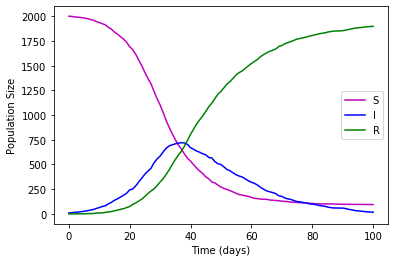

In [168]:
Plot_Dynamics(Population_11, T)

## Histogram

In [100]:
def RtHistogram(simulation, T):
    """Plots the evolution of the populations of susceptible,
    infected and removed individuals over time for a simulation.
        
    Parameters
    ----------
    simulation : list
        List of Persona objects obtained from the function Simulacion_Contagios. 

    T : int
        Number of days in the simulation
    """
        
    Infections_mean = []
    for person in simulation:
        if len(person.infections) != 0:
            Infections_mean.append(sum(person.infections.values())/len(person.infections.keys()))
    
    plt.hist(Infections_mean, bins = 15)
    plt.xlabel('Mean Number of Infections')
    plt.ylabel('Density')
    plt.title('')
    plt.show()

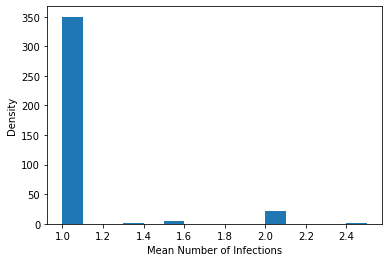

In [101]:
RtHistogram(Population_11, T)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


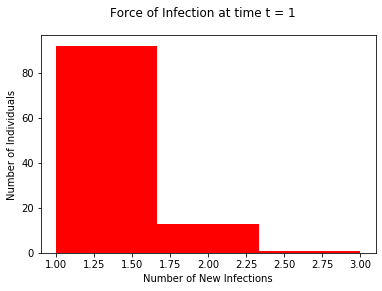

In [102]:
from matplotlib.animation import FuncAnimation
fig, (ax1) = plt.subplots(1, 1)
def animacion1(i): 
    
    Infections = []
    I = 0

    ax1.clear()    
    for person in Population_11:
        if i in person.infections.keys():
            Infections.append(person.infections[i])
    
    fig.suptitle('Force of Infection at time t = {}'.format(i))
        
    ax1.hist(Infections,bins=3,color='red')
    ax1.set_xlabel('Number of New Infections')
    ax1.set_ylabel('Number of Individuals')

animator1 = FuncAnimation(fig, animacion1, frames=np.arange(1,30,1), interval=500, repeat = False)
animator1.save('RtGPSIR.gif')